In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("shoe.csv")

In [3]:
df.head()

,size(cm),class(y)
0,9.500,Female
1,10.125,Male
2,10.410,Male
3,9.810,Female
4,11.050,Male


In [4]:
df['class(y)'].value_counts()

class(y)
Male      22
Female    18
Name: count, dtype: int64

## Label Encoder

In [5]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

In [6]:
df['class(y)']=le.fit_transform(df['class(y)'])

In [7]:
df.head()

,size(cm),class(y)
0,9.500,0
1,10.125,1
2,10.410,1
3,9.810,0
4,11.050,1


In [8]:
x=df[['size(cm)']]

In [9]:
y=df['class(y)']

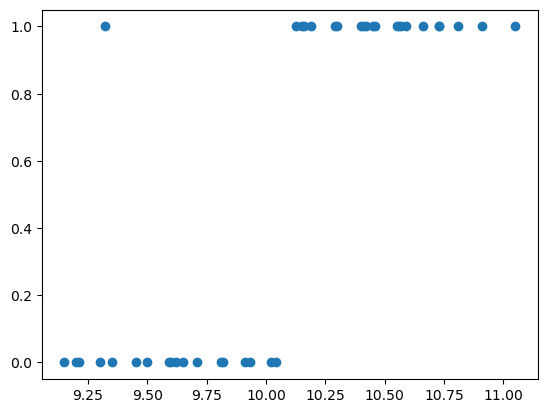

In [10]:
plt.scatter(x,y)

## Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
reg=LogisticRegression()

In [13]:
reg.fit(x,y)

LogisticRegression()

In [14]:
reg.coef_

array([[2.62700105]])

In [15]:
reg.intercept_

array([-26.18202542])

In [16]:
np.array(df['class(y)'])  ## ORGINAL

array([0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1])

In [17]:
reg.predict(df[['size(cm)']])

array([0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0])

In [18]:
reg.predict([[9.400]])

array([0])

In [19]:
reg.predict_proba([[9.500]])

array([[0.7730327, 0.2269673]])

## Decision Boundary for logistic regression

In [20]:
reg.predict_proba(df[['size(cm)']])[:,1]

array([0.2269673 , 0.60261197, 0.76225012, 0.39863759, 0.94512899,
       0.10480259, 0.20475022, 0.82996451, 0.33763638, 0.30333534,
       0.40495163, 0.76697806, 0.642703  , 0.92262478, 0.82242083,
       0.88139381, 0.53507359, 0.47604212, 0.70601037, 0.83725113,
       0.61822836, 0.16526479, 0.11778075, 0.86078267, 0.28694351,
       0.78522943, 0.70052842, 0.90166437, 0.78076596, 0.88139381,
       0.54811693, 0.46295676, 0.75745659, 0.27109279, 0.62440911,
       0.14793175, 0.12053796, 0.82622499, 0.27631488, 0.15467754])

In [21]:
reg.predict_proba(df[['size(cm)']])[:,0]

array([0.7730327 , 0.39738803, 0.23774988, 0.60136241, 0.05487101,
       0.89519741, 0.79524978, 0.17003549, 0.66236362, 0.69666466,
       0.59504837, 0.23302194, 0.357297  , 0.07737522, 0.17757917,
       0.11860619, 0.46492641, 0.52395788, 0.29398963, 0.16274887,
       0.38177164, 0.83473521, 0.88221925, 0.13921733, 0.71305649,
       0.21477057, 0.29947158, 0.09833563, 0.21923404, 0.11860619,
       0.45188307, 0.53704324, 0.24254341, 0.72890721, 0.37559089,
       0.85206825, 0.87946204, 0.17377501, 0.72368512, 0.84532246])

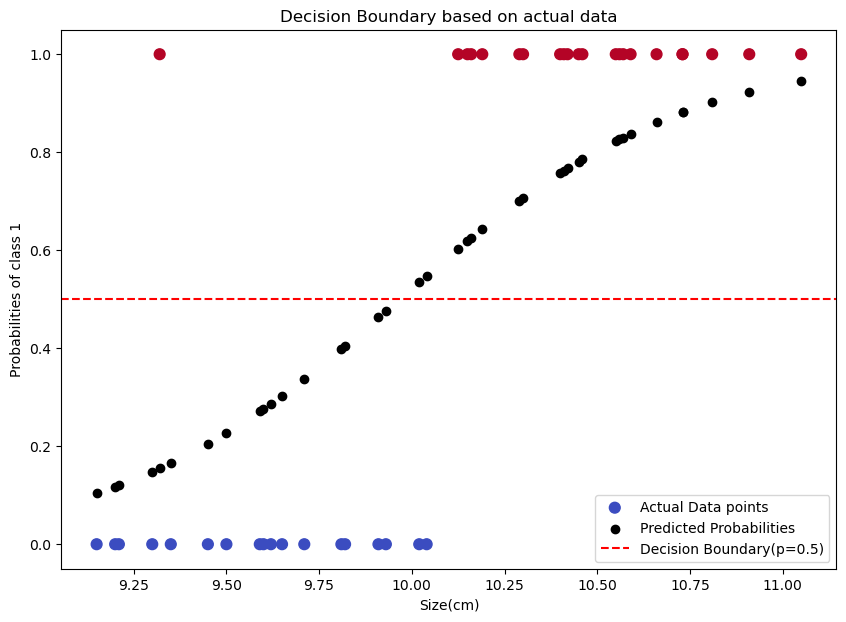

In [37]:
y_prob=reg.predict_proba(df[['size(cm)']])[:,1]
plt.figure(figsize=(10,7))

plt.scatter(x,y,c=y, cmap='coolwarm',s=60,label='Actual Data points')
plt.scatter(x,y_prob,color='black',label='Predicted Probabilities')
plt.axhline(0.5,color='red',linestyle='--',label='Decision Boundary(p=0.5)')

plt.title("Decision Boundary based on actual data")
plt.xlabel("Size(cm)")
plt.ylabel("Probabilities of class 1")

plt.legend()
plt.show()